In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

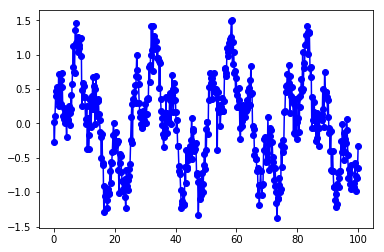

In [3]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [4]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

CMA on 32 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=294290, Sat Oct 28 18:14:22 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 4.127408154705878e-01 1.0e+00 9.31e-01  9e-01  9e-01 0:00.3
    2     28 4.833478207686757e-01 1.1e+00 8.79e-01  9e-01  9e-01 0:00.6
    3     42 4.290364058371793e-01 1.1e+00 8.35e-01  8e-01  8e-01 0:00.8
   16    224 4.168861294751862e-01 1.2e+00 5.96e-01  6e-01  6e-01 0:03.9
   34    476 4.090937724668446e-01 1.4e+00 4.21e-01  4e-01  4e-01 0:08.0


In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,100))
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, maxiter=100)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.xaxis("t")
plt.yaxis("y(t)")
plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [2]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:100,0]
X_train = MNIST_train[0:100,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [3]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(784,10,Qmax=50,paramBound=100))
#M.add(layers.DiagExpectationUnitLayer(10,1))
M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

enc = LabelBinarizer()
enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
T=enc.transform(Y_train)


In [ ]:
minim = minimizer.CMA(True)

sol=minim.train(crossentropy,M, np.transpose(X_train), np.transpose(Y_train), maxiter=250)

CMA on 32 cpu(s) enabled
(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 7860 (seed=290243, Sat Oct 28 18:15:02 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 4.849686377514379e+01 1.0e+00 9.99e+00  1e+01  1e+01 0:01.9
    2     60 3.078801038449622e+01 1.0e+00 9.97e+00  1e+01  1e+01 0:03.6
    3     90 3.865653304470516e+01 1.0e+00 9.96e+00  1e+01  1e+01 0:05.2
    5    150 3.109527811365137e+01 1.0e+00 9.94e+00  1e+01  1e+01 0:08.6
    8    240 2.010699601584940e+01 1.0e+00 9.90e+00  1e+01  1e+01 0:13.4
   11    330 1.808670641274793e+01 1.0e+00 9.87e+00  1e+01  1e+01 0:18.4
   15    450 1.573346596964688e+01 1.0e+00 9.83e+00  1e+01  1e+01 0:24.8
   20    600 1.446063572045352e+01 1.0e+00 9.78e+00  1e+01  1e+01 0:32.9
   25    750 1.330747040069187e+01 1.0e+00 9.73e+00  1e+01  1e+01 0:40.9
   31    930 1.294806641237074e+01 1.0e+00 9.67e+00  1e+01  1e+01 0:50.7
   38   1140 1.250188517306145e+01 1.0e+00 9.60e+00  1e+01  1e+01 1:02.1
   45

In [ ]:
sol

In [ ]:
P=np.argmax(np.real(M.predict(np.transpose(X_train))),axis=0)


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
P=np.argmax(np.real(M.predict(np.transpose(X_test))),axis=0)


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))